In [2]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv("/content/insurance.csv")

# Display the first few rows and structure of the dataset
print(dataset.head())
print(dataset.info())


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [3]:
# Create a vector (age column)
ages = dataset['age']

# Create a factor (categorical variable for smoker)
smoker_factor = dataset['smoker'].astype('category')

# Create a list
data_list = [ages, smoker_factor, dataset]

# Create a matrix (e.g., age and expenses columns)
matrix = dataset[['age', 'expenses']].values

# Create a data frame
df = pd.DataFrame({'Age': dataset['age'], 'Smoking': dataset['smoker'], 'Expenses': dataset['expenses']})

# Display structures
print("Vector (Ages):", ages.head())
print("Factor (Smoker):", smoker_factor.head())
print("List:", data_list[:2])  # Display part of the list
print("Matrix:\n", matrix[:5])  # Display first 5 rows
print("DataFrame:\n", df.head())


Vector (Ages): 0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64
Factor (Smoker): 0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: category
Categories (2, object): ['no', 'yes']
List: [0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: category
Categories (2, object): ['no', 'yes']]
Matrix:
 [[1.900000e+01 1.688492e+04]
 [1.800000e+01 1.725550e+03]
 [2.800000e+01 4.449460e+03]
 [3.300000e+01 2.198447e+04]
 [3.200000e+01 3.866860e+03]]
DataFrame:
    Age Smoking  Expenses
0   19     yes  16884.92
1   18      no   1725.55
2   28      no   4449.46
3   33      no  21984.47
4   32      no   3866.86


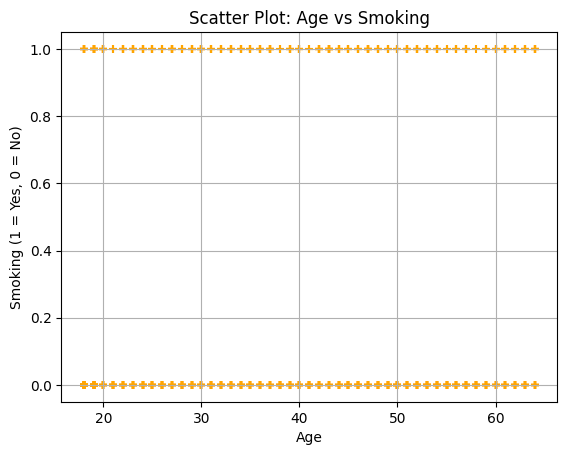

In [4]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(dataset['age'], dataset['smoker'].apply(lambda x: 1 if x == 'yes' else 0), c='orange', marker='+')
plt.title('Scatter Plot: Age vs Smoking')
plt.xlabel('Age')
plt.ylabel('Smoking (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()


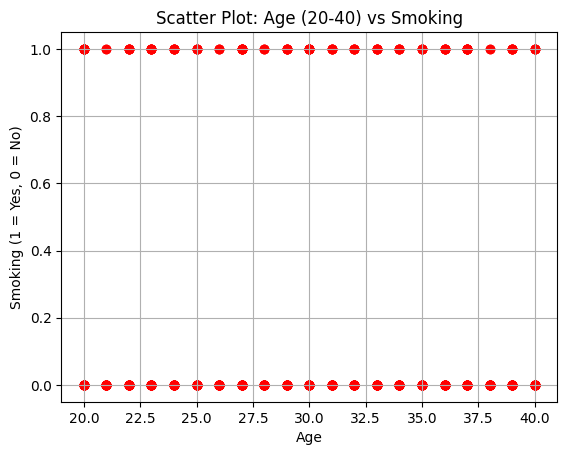

In [5]:
# Filter data for ages 20 to 40
filtered_data = dataset[(dataset['age'] >= 20) & (dataset['age'] <= 40)]

# Scatter plot for filtered data
plt.scatter(filtered_data['age'], filtered_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0), c='red', marker='o')
plt.title('Scatter Plot: Age (20-40) vs Smoking')
plt.xlabel('Age')
plt.ylabel('Smoking (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()


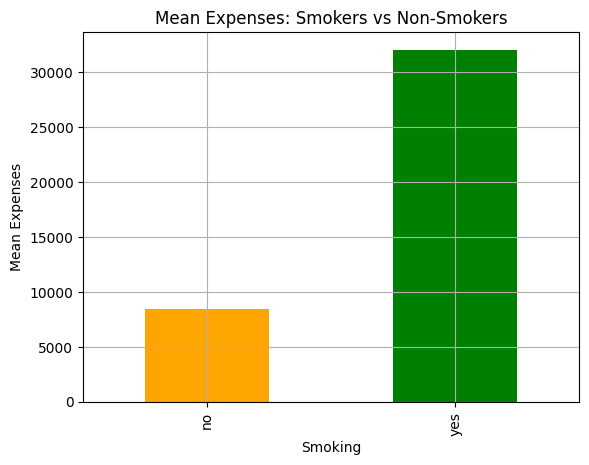

In [6]:
# Group data by smoker and calculate mean expenses
expenses_summary = dataset.groupby('smoker')['expenses'].mean()

# Bar plot of expenses
expenses_summary.plot(kind='bar', color=['orange', 'green'])
plt.title('Mean Expenses: Smokers vs Non-Smokers')
plt.xlabel('Smoking')
plt.ylabel('Mean Expenses')
plt.grid(True)
plt.show()


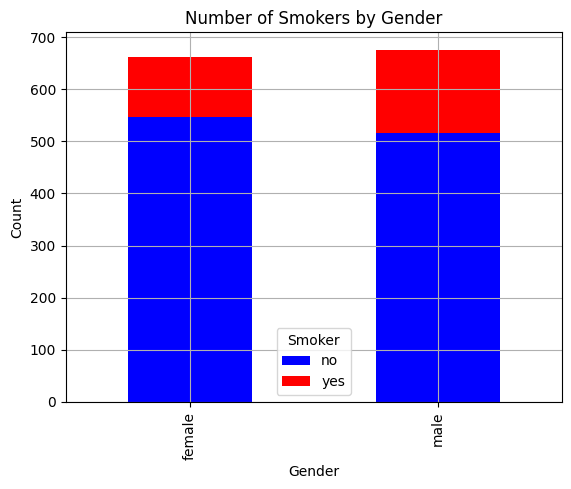

In [7]:
# Count smokers by gender
gender_smokers = dataset.groupby(['sex', 'smoker']).size().unstack()

# Bar plot for gender vs smoker
gender_smokers.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Number of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.grid(True)
plt.show()


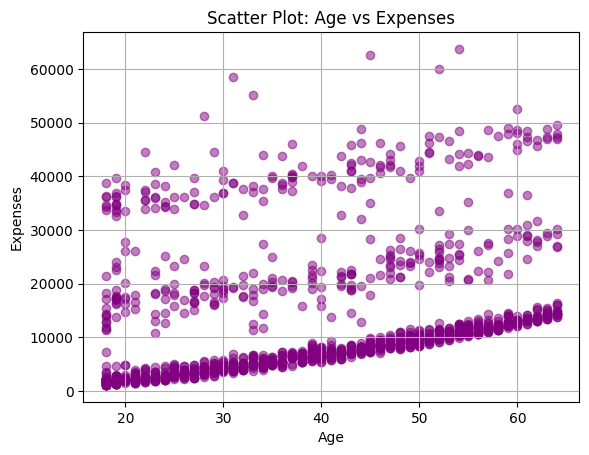

In [8]:
# Scatter plot: Age vs Expenses
plt.scatter(dataset['age'], dataset['expenses'], c='purple', alpha=0.5)
plt.title('Scatter Plot: Age vs Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.grid(True)
plt.show()


In [12]:
teenage_smokers = dataset[(dataset['age'] >= 13) & (dataset['age'] <= 19) & (dataset['smoker'] == 'yes')]
num_teenage_smokers = len(teenage_smokers)
print("Number of teenage smokers:", num_teenage_smokers)

Number of teenage smokers: 30
